In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df =  pd.read_csv('data_cleaned_final.csv')
df.head()

,City,Full_Address,Postal_Code,Amenities,Association_fee,latitude,longitude,List_Date,List_Price,MLS_Days_On_Market,...,Photos,Acres,Bathrooms,Bedrooms,Garage_Spaces,Lot_Size_Area,Parking_Spaces,Sub_Type,Year_Built,Remarks
0,Ontario,4034 S Inglenook Way,91761.0,"Pool,Spa,Fire Pit,Barbecue,Outdoor Cooking Are...",151.0,34.000034,-117.583168,2019-01-19T00:00:00Z,568000.0,0.0,...,http://media.crmls.org/medias/a1d6c638-fd49-40...,0.0930,3.0,4.0,2.0,4050.0,2.0,SingleFamilyResidence,2019.0,"MOVE-IN FEBRUARY 28, 2019. This brand new 4 b..."
1,Bellflower,10292 Artesia Blvd,90706.0,"Fire Pit,Barbecue,Picnic Area",330.0,33.872722,-118.115333,2018-09-09T00:00:00Z,465755.0,131.0,...,http://media.crmls.org/medias/dd5dfa12-f8fe-47...,0.0000,3.0,3.0,0.0,0.0,0.0,Condominium,2019.0,"Plan 4 (1,230 sq. ft.) is a condominium with 3..."
2,Canyon Lake,22672 Canyon Lake Drive,92587.0,"Pool,Spa,Barbecue,Outdoor Cooking Area,Picnic ...",248.0,33.683683,-117.263206,2018-05-28T00:00:00Z,750000.0,149.0,...,http://media.crmls.org/medias/b5152689-5139-4a...,0.1791,3.0,4.0,3.0,7800.0,3.0,SingleFamilyResidence,2019.0,This is your chance to get the custom new buil...
3,Desert Hot Springs,11558 Bald Eagle Lane,92240.0,"Dues Paid Monthly,Call for Rules,Controlled Ac...",90.0,33.964296,-116.521878,2019-01-17T00:00:00Z,359900.0,1.0,...,http://media.crmls.org/medias/d5148750-ef31-4b...,0.1700,3.0,4.0,2.0,7405.0,2.0,SingleFamilyResidence,2019.0,Brand New 2019 construction at Eagle Point Gat...
4,Irvine,103 Spacial,92618.0,"Pool,Spa,Barbecue,Playground,Tennis,Biking Tra...",295.0,33.685499,-117.709165,2019-01-15T00:00:00Z,2441540.0,6.0,...,http://media.crmls.org/medias/2fe072ad-e35d-4d...,0.1575,6.0,5.0,3.0,6860.0,3.0,SingleFamilyResidence,2019.0,Luxurious living and entertaining. The Altamir...


In [3]:
df = df[['Association_fee', 'List_Price', 'MLS_Days_On_Market', 'Lot_Size_Area', 'Bathrooms', 'Bedrooms', 
         'Garage_Spaces','Year_Built']]
df.head()

,Association_fee,List_Price,MLS_Days_On_Market,Lot_Size_Area,Bathrooms,Bedrooms,Garage_Spaces,Year_Built
0,151.0,568000.0,0.0,4050.0,3.0,4.0,2.0,2019.0
1,330.0,465755.0,131.0,0.0,3.0,3.0,0.0,2019.0
2,248.0,750000.0,149.0,7800.0,3.0,4.0,3.0,2019.0
3,90.0,359900.0,1.0,7405.0,3.0,4.0,2.0,2019.0
4,295.0,2441540.0,6.0,6860.0,6.0,5.0,3.0,2019.0


In [4]:
X = df[['Association_fee', 'MLS_Days_On_Market', 'Lot_Size_Area', 'Bathrooms', 'Bedrooms', 
         'Garage_Spaces','Year_Built']]
y = df = df[['List_Price']]

print("Shape: ", X.shape, y.shape)

Shape:  (11417, 7) (11417, 1)


In [5]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=21)

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [6]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

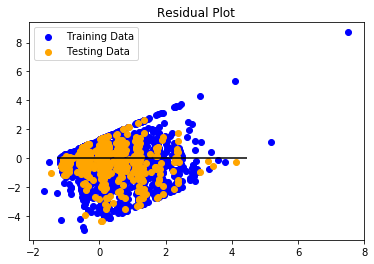

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
r21 = r2_score(y_test_scaled, predictions)

print(f"MSE: {MSE}, R2: {r2}, R21: {r21}")

MSE: 0.6133214359414956, R2: 0.45286020299057606, R21: 0.45286020299057606
